## Cài đặt thư viện

# Tải dữ liệu cổ phiếu VNM và xem dữ liệu:
* Gọi dữ liệu giá lịch sử, bạn có thể cập nhật mã mới thay vì khởi tạo lại đối tượng một cách bất tiện: `stock.quote.history(symbol='VNM.VN', start='2023-08-15', end='2024-08-15')`

In [ ]:
import yfinance as yf
#import vnstock
import pandas as pd

# Tải dữ liệu cổ phiếu, ví dụ: cổ phiếu VNM
df = yf.download('VNM.VN', start='2023-08-15', end='2024-08-15')

# Xem dữ liệu
print(df.head())
print(df.tail())
print(df.describe())


[*********************100%%**********************]  1 of 1 completed

               Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2023-08-15  72900.0  73400.0  72700.0  72800.0  68058.109375  2259703
2023-08-16  72800.0  73500.0  72500.0  73100.0  68338.562500  2083904
2023-08-17  73100.0  74500.0  72900.0  73600.0  68805.992188  4650904
2023-08-18  73500.0  74800.0  72100.0  73300.0  68525.546875  7106201
2023-08-21  72700.0  73800.0  72700.0  72900.0  68151.585938  3617708
               Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2024-08-08  73900.0  74400.0  72200.0  72700.0  70256.726562  7608800
2024-08-09  72800.0  73400.0  72500.0  73300.0  70836.554688  4527500
2024-08-12  73300.0  74400.0  72800.0  73000.0  70546.640625  5804000
2024-08-13  72800.0  74400.0  72700.0  73800.0  71319.757812  6834400
2024-08-14  74000.0  74100.0  73300.0  74000.0  71513.031250  5456225
               Open 

In [ ]:
df['Returns'] = df['Close'].pct_change().dropna()

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

v_n1 = 5
v_n2 = 120

class SmaCross(Strategy):
    n1 = v_n1
    n2 = v_n2

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()

bt = Backtest(df, SmaCross, cash=100000, commission=.002, exclusive_orders=True)

output = bt.run()
filename = 'SMA_' + str(v_n1) + '_' + str(v_n2) + '.csv'
print('filename:', filename)
print('backtesting output')
print(output)
output.to_csv(filename)

bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '
/usr/local/lib/python3.10/dist-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
/usr/local/lib/python3.10/dist-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-cons

filename: SMA_5_120.csv
backtesting output
Start                     2023-08-15 00:00:00
End                       2024-08-14 00:00:00
Duration                    365 days 00:00:00
Exposure Time [%]                   48.387097
Equity Final [$]                      95775.2
Equity Peak [$]                      102018.8
Return [%]                            -4.2248
Buy & Hold Return [%]                1.648352
Return (Ann.) [%]                   -4.291459
Volatility (Ann.) [%]                9.565377
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -10.629021
Avg. Drawdown [%]                   -3.324787
Max. Drawdown Duration      113 days 00:00:00
Avg. Drawdown Duration       35 days 00:00:00
# Trades                                    3
Win Rate [%]                        33.333333
Best Trade [%]                        2.85835
Worst Trade [%]                     -

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1366', ...)

# Tính toán thống kê và vẽ biểu đồ

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.r

Stat                 Open        High        Low         Close       Adj Close    Volume      Returns
-------------------  ----------  ----------  ----------  ----------  -----------  ----------  ----------
Start                2023-08-16  2023-08-16  2023-08-16  2023-08-16  2023-08-16   2023-08-16  2023-08-16
End                  2024-08-14  2024-08-14  2024-08-14  2024-08-14  2024-08-14   2024-08-14  2024-08-14
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%        0.00%       0.00%

Total Return         1.65%       0.82%       1.10%       1.23%       4.65%        161.83%     -34.24%
Daily Sharpe         0.18        0.13        0.15        0.16        0.33         3.30        -
Daily Sortino        0.35        0.27        0.25        0.30        0.63         9.61        -
CAGR                 1.65%       0.82%       1.11%       1.24%       4.66%        162.69%     -34.33%
Max Drawdown         -20.10%     -20.81%     -20.75%     -20.92%     -18.25%      -87.

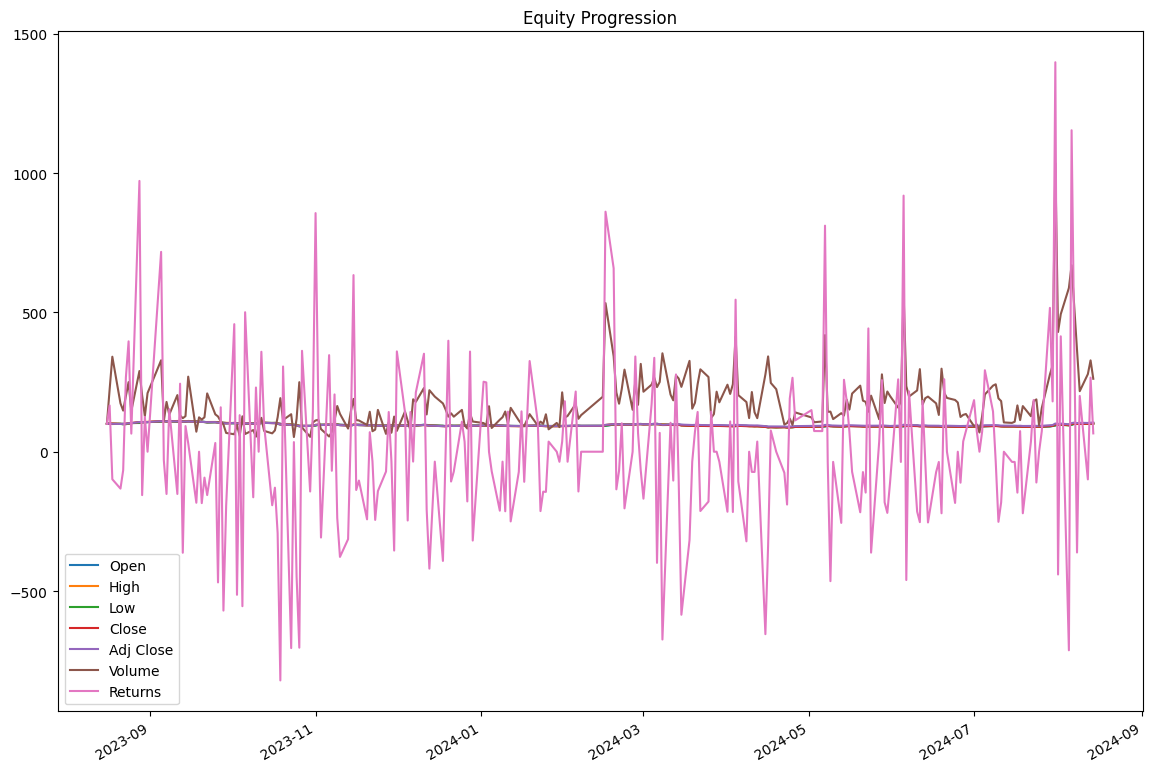

In [ ]:
import ffn
import plotly.express as px

perf = df.calc_stats()
perf.plot(figsize=(14, 10))
print(perf.display())

fig = px.line(df, x=df.index, y="Close", title='Stock Price')
fig.update_layout(title='Stock Price Over Time', xaxis_title='Date', yaxis_title='Price')
fig.show()

returns = df['Returns'].dropna()
fig = px.line(returns, x=returns.index, y=returns, title='Stock Returns')
fig.update_layout(title='Stock Returns Over Time', xaxis_title='Date', yaxis_title='Returns')
fig.show()

fig = px.histogram(returns, x=returns, nbins=40, histnorm='probability', width=800, height=400)
fig.update_layout(title='Stock Returns Histogram')
fig.show()

fig = px.box(returns, y=returns, points='all')
fig.update_layout(title='Stock Returns Box Plot')
fig.update_traces(boxmean='sd')
fig.show()

# 1. Xây dựng và huấn luyện mô hình ARIMA

[*********************100%%**********************]  1 of 1 completed


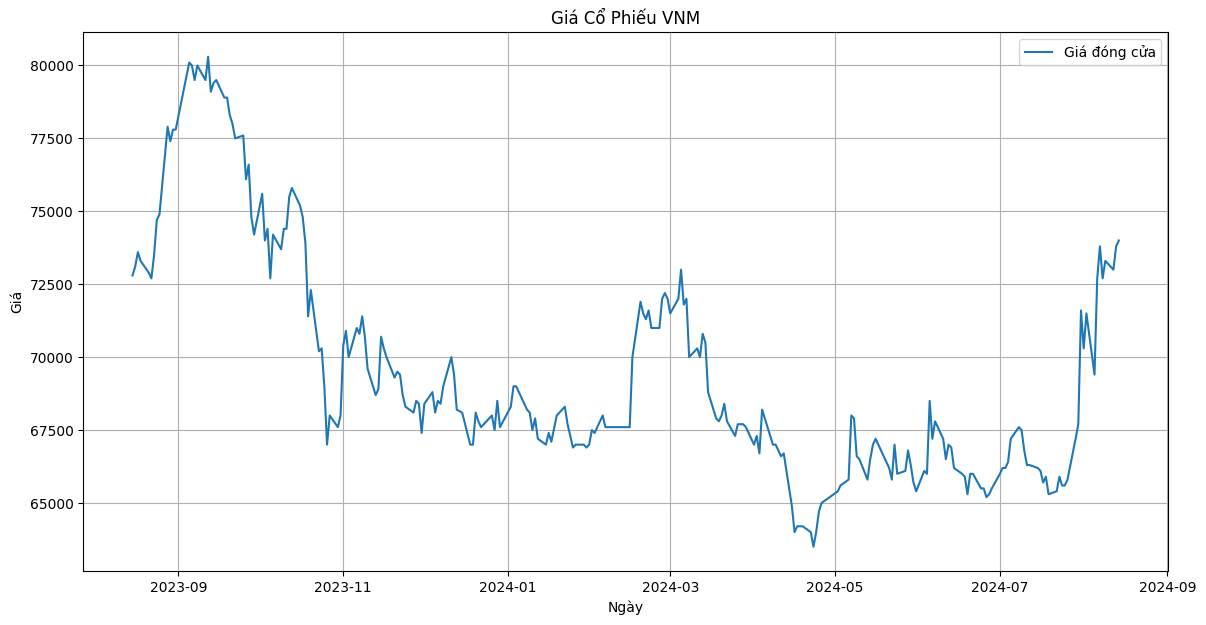

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

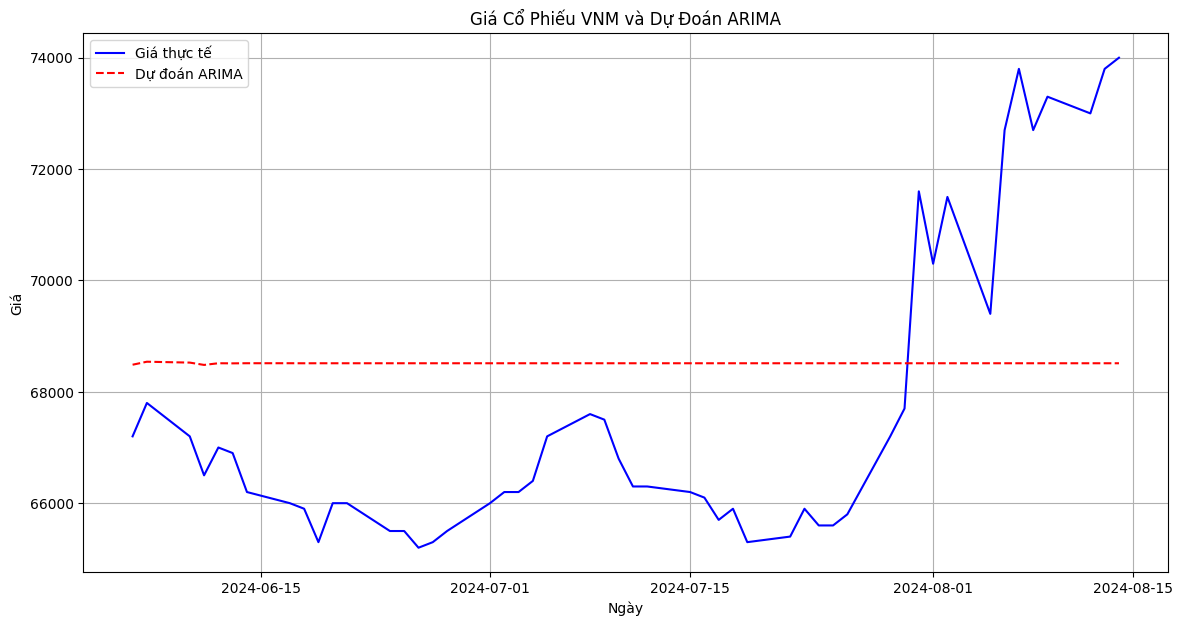

[*********************100%%**********************]  1 of 1 completed

MSE của mô hình ARIMA: 8131286.104353474



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



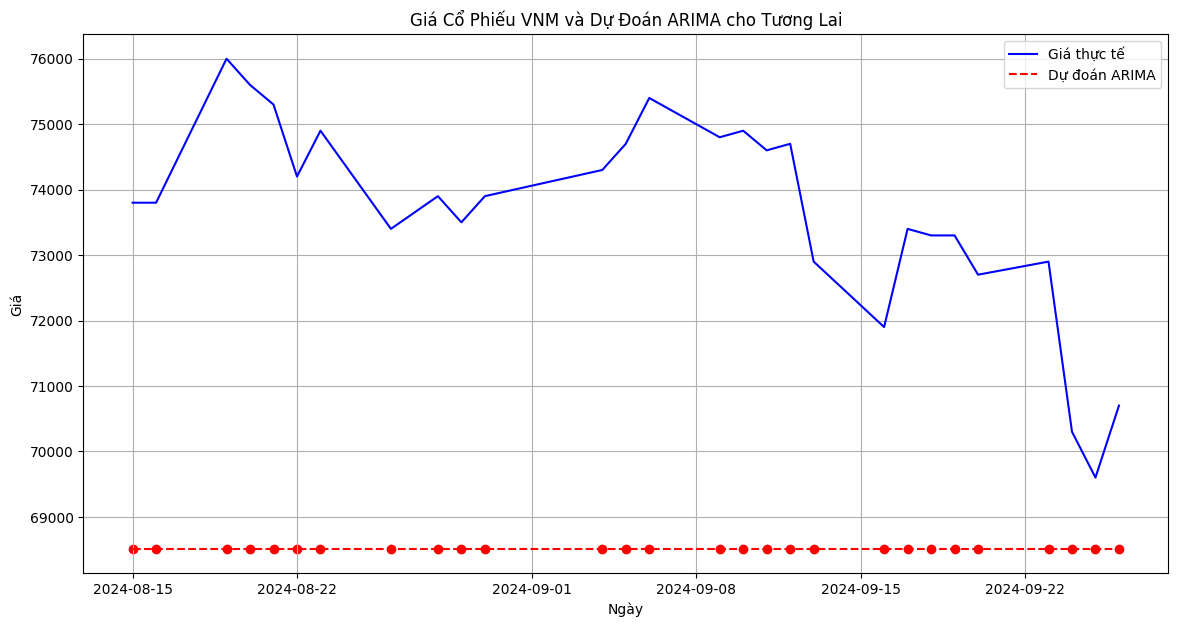

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Tải dữ liệu từ ngày 15/08/2023 đến ngày 15/08/2024
df = yf.download('VNM.VN', start='2023-08-15', end='2024-08-15')

# Vẽ biểu đồ dữ liệu đóng cửa
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Giá đóng cửa')
plt.title('Giá Cổ Phiếu VNM')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)
plt.show()

# Train-Test Split: 80% cho huấn luyện, 20% cho kiểm tra
train_size = int(len(df) * 0.8)
train_data, test_data = df['Close'][:train_size], df['Close'][train_size:]

# p, d, q lần lượt là các tham số: AR, I (difference), MA
model_arima = ARIMA(train_data, order=(5, 1, 0))
model_arima_fit = model_arima.fit()

# Dự đoán giá cho tập kiểm tra
test_start = len(train_data)
test_end = len(df) - 1
arima_predictions = model_arima_fit.predict(start=test_start, end=test_end, typ='levels')

plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data.values, label='Giá thực tế', color='blue')
plt.plot(test_data.index, arima_predictions, color='red', linestyle='--', label='Dự đoán ARIMA')
plt.title('Giá Cổ Phiếu VNM và Dự Đoán ARIMA')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)
plt.show()

# Tính MSE để đánh giá mô hình
mse = mean_squared_error(test_data, arima_predictions)
print(f'MSE của mô hình ARIMA: {mse}')
# Dự đoán giá cổ phiếu cho tương lai
# Lấy dữ liệu từ 15/08/2024 đến hiện tại
end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
future_df = yf.download('VNM.VN', start='2024-08-15', end=end_date)

# Sử dụng mô hình để dự đoán giá trong tương lai
future_start = len(df)
future_end = future_start + len(future_df) - 1
future_arima_predictions = model_arima_fit.predict(start=future_start, end=future_end, typ='levels')

# So sánh dự đoán và giá thực tế cho tương lai - Dữ liệu thực tế - Dự đoán ARIMA
plt.figure(figsize=(14, 7))
plt.plot(future_df.index, future_df['Close'], label='Giá thực tế', color='blue')
plt.plot(future_df.index, future_arima_predictions, color='red', linestyle='--', label='Dự đoán ARIMA')

# Đánh dấu các điểm dự đoán
plt.scatter(future_df.index, future_arima_predictions, color='red', marker='o')
plt.title('Giá Cổ Phiếu VNM và Dự Đoán ARIMA cho Tương Lai')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)
plt.show()

# 2. Xây dựng và huấn luyện mô hình XGBoost

[*********************100%%**********************]  1 of 1 completed


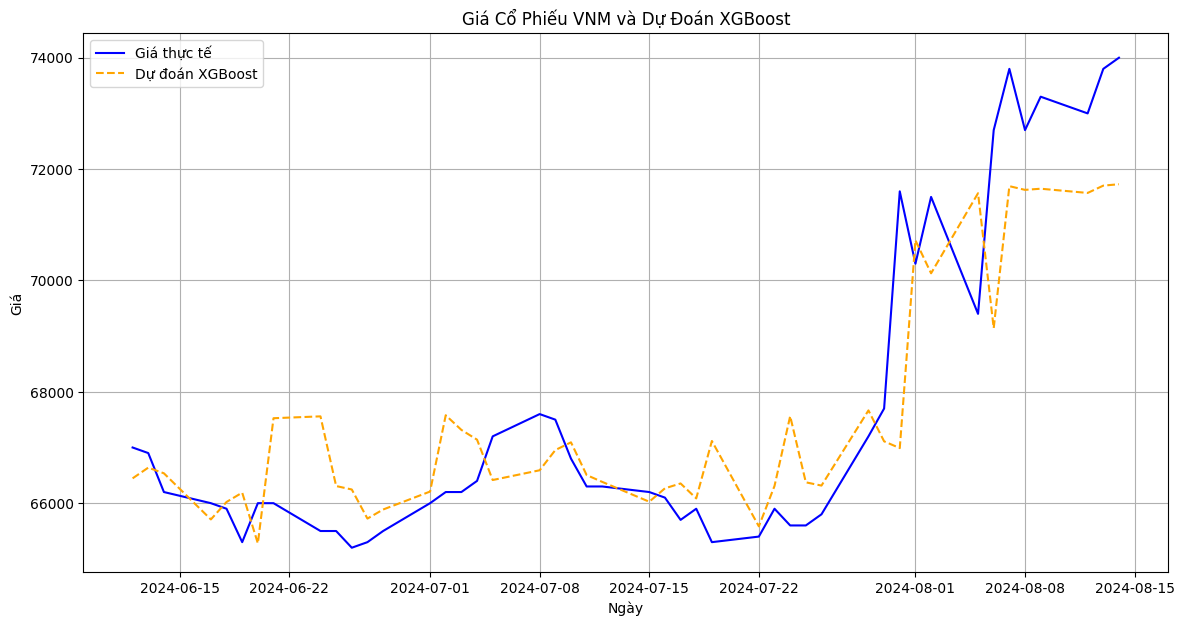

MSE của mô hình XGBoost: 1874860.0117111206


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = yf.download('VNM.VN', start='2023-08-15', end='2024-08-15')
df['Returns'] = df['Close'].pct_change().dropna()
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df.dropna(inplace=True)
X = df[['Close', 'SMA_5', 'SMA_20', 'Returns']]
y = df['Close'].shift(-1).dropna()
X = X[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'eta': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

num_boost_round = 1000
early_stopping_rounds = 100
# Huấn luyện mô hình
model_xgb = xgb.train(params, dtrain, num_boost_round=num_boost_round, evals=[(dtest, 'eval')],
                      early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
y_pred = model_xgb.predict(dtest)

plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='Giá thực tế', color='blue')
plt.plot(df.index[-len(y_test):], y_pred, color='orange', linestyle='--', label='Dự đoán XGBoost')
plt.title('Giá Cổ Phiếu VNM và Dự Đoán XGBoost')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)
plt.show()
mse_xgb = mean_squared_error(y_test, y_pred)
print(f'MSE của mô hình XGBoost: {mse_xgb}')

## 3. Xây dựng mô hình LightGBM

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.


[*********************100%%**********************]  1 of 1 completed


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 182, number of used features: 4
[LightGBM] [Info] Start training from score 69217.032967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

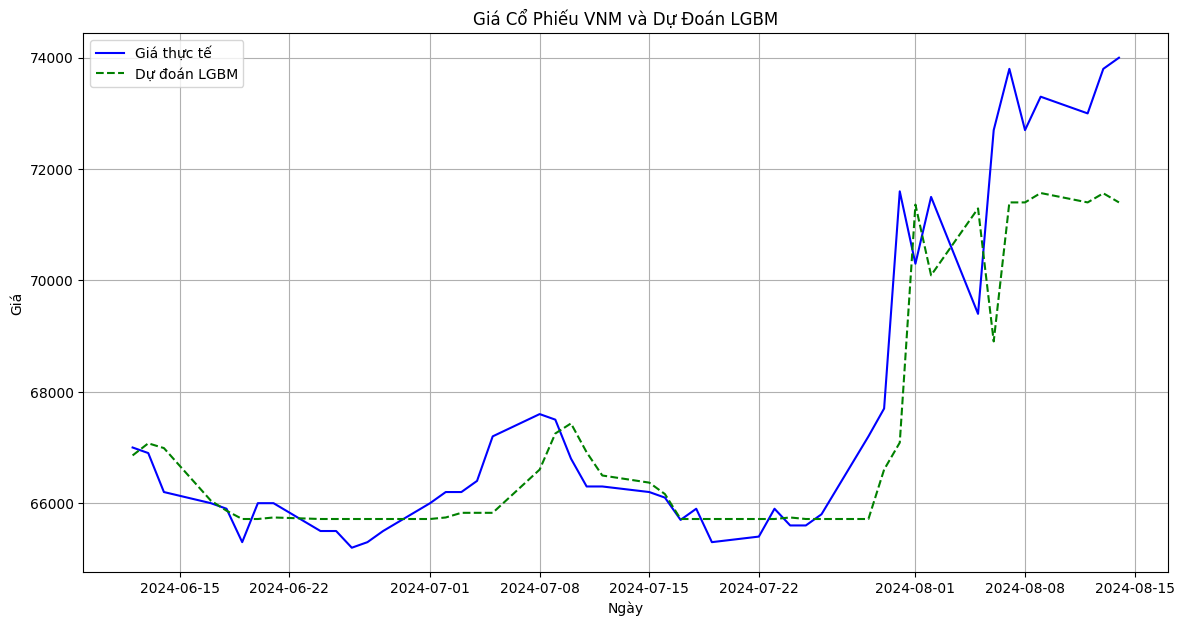

MSE của mô hình LGBM: 1654308.097365141


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = yf.download('VNM.VN', start='2023-08-15', end='2024-08-15')
df['Returns'] = df['Close'].pct_change().dropna()
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df.dropna(inplace=True)

X = df[['Close', 'SMA_5', 'SMA_20', 'Returns']]
y = df['Close'].shift(-1).dropna()
X = X[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Xây dựng mô hình LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)
params = {
    'objective': 'regression',
    'metric': 'mse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'boosting_type': 'gbdt'
}
model_lgbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=[lgb_test],
    callbacks=[lgb.early_stopping(stopping_rounds=100)]
)

y_pred = model_lgbm.predict(X_test, num_iteration=model_lgbm.best_iteration)
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='Giá thực tế', color='blue')
plt.plot(df.index[-len(y_test):], y_pred, color='green', linestyle='--', label='Dự đoán LGBM')
plt.title('Giá Cổ Phiếu VNM và Dự Đoán LGBM')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)
plt.show()

mse_lgbm = mean_squared_error(y_test, y_pred)
print(f'MSE của mô hình LGBM: {mse_lgbm}')

 # 4. Xây dựng mô hình LSTM

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1951
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0833 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0258 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078  
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0069
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 


[*********************100%%**********************]  1 of 1 completed

scaled_future_data shape: (28, 1)
X_future shape before reshape: (23, 5, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


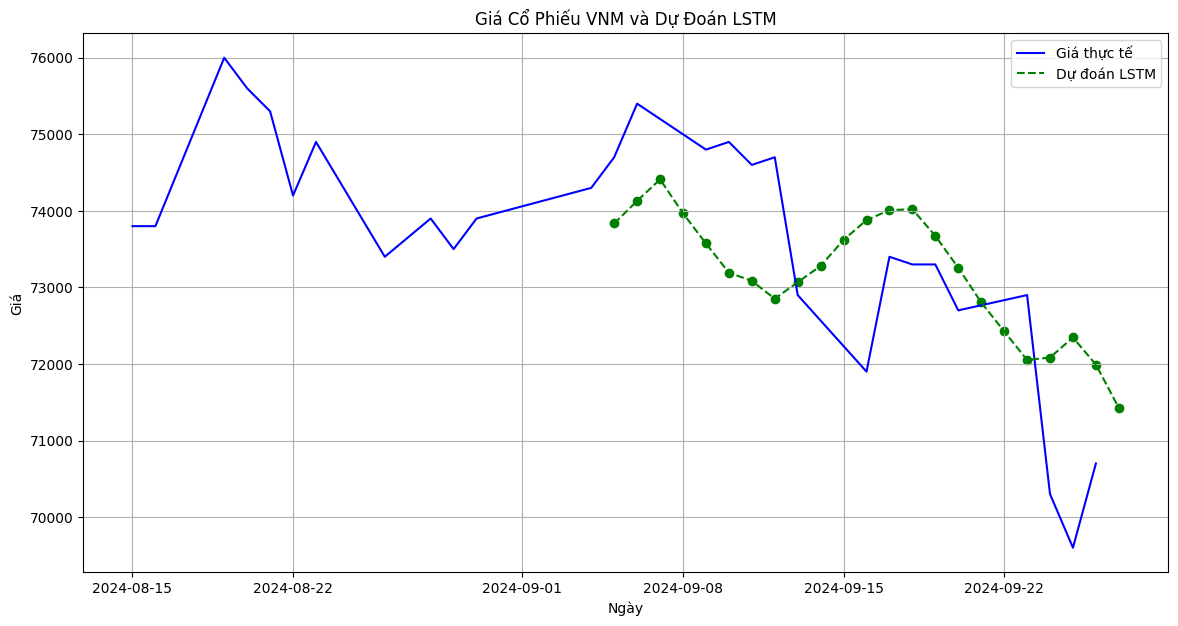

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df = yf.download('VNM.VN', start='2023-08-15', end='2024-08-15')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_dataset(scaled_data, time_step)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)
end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
future_df = yf.download('VNM.VN', start='2024-08-15', end=end_date)
scaled_future_data = scaler.transform(future_df[['Close']])
print("scaled_future_data shape:", scaled_future_data.shape)

if len(scaled_future_data) > time_step:
    X_future, _ = create_dataset(scaled_future_data, time_step)
    print("X_future shape before reshape:", X_future.shape)
    X_future = X_future.reshape((X_future.shape[0], X_future.shape[1], 1))
    future_predictions = model_lstm.predict(X_future)
    future_predictions = scaler.inverse_transform(future_predictions)
    future_dates = pd.date_range(start='2024-08-15', end=end_date)
    plt.figure(figsize=(14, 7))
    plt.plot(future_df.index, future_df['Close'], label='Giá thực tế', color='blue')
    if len(future_dates) > len(future_predictions):
        future_dates = future_dates[-len(future_predictions):]
        plt.plot(future_dates, future_predictions, color='green', linestyle='--', label='Dự đoán LSTM')
    plt.scatter(future_dates, future_predictions, color='green', marker='o')
    plt.title('Giá Cổ Phiếu VNM và Dự Đoán LSTM')
    plt.xlabel('Ngày')
    plt.ylabel('Giá')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Không đủ dữ liệu để tạo tập dự đoán.")